In [40]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Get the folder where dataset is stored
%cd /content/drive/MyDrive/Greyscale Datasets/LicensePlates.v2i.yolov8

/content/drive/MyDrive/Greyscale Datasets/LicensePlates.v2i.yolov8


In [ ]:
# Checking what's in it
!ls

data.yaml	    README.roboflow.txt  test	valid
README.dataset.txt  runs		 train	yolov8n.pt


In [ ]:
# Installing Ultralytics Library
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.0 MB/s eta 0:00:00


In [ ]:
# Path adjustment
!cat data.yaml

train: /content/drive/MyDrive/Greyscale Datasets/LicensePlates.v2i.yolov8/train/images
val: /content/drive/MyDrive/Greyscale Datasets/LicensePlates.v2i.yolov8/valid/images
test: /content/drive/MyDrive/Greyscale Datasets/LicensePlates.v2i.yolov8/test/images

nc: 1
names: ['license_plate']


In [41]:
# Import Yolo Model
from ultralytics import YOLO

# Create a model object
# If you want to train from scratch, use 'yolov8n.pt' or 'yolov8s.pt'
model = YOLO('yolov8n.pt')

In [ ]:
%%writefile data.yaml
train: /content/drive/MyDrive/Greyscale Datasets/LicensePlates.v2i.yolov8/train/images
val: /content/drive/MyDrive/Greyscale Datasets/LicensePlates.v2i.yolov8/valid/images
test: /content/drive/MyDrive/Greyscale Datasets/LicensePlates.v2i.yolov8/test/images

nc: 1
names: ['license_plate']

Overwriting data.yaml


In [ ]:
# Training Model
model.train(
    data="/content/drive/MyDrive/Greyscale Datasets/LicensePlates.v2i.yolov8/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    name="roboflow_yolov8_run",
    device='cpu',   # force CPU
    augment=True
)


Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Greyscale Datasets/LicensePlates.v2i.yolov8/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=roboflow_yolov8_run4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, over

In [13]:
from ultralytics import YOLO

# Loading the trained YOLOv8 model
model = YOLO('/content/drive/MyDrive/Greyscale Datasets/LicensePlates.v2i.yolov8/runs/detect/roboflow_yolov8_run4/weights/best.pt')

In [16]:
import os

test_folder = "/content/drive/MyDrive/Greyscale Datasets/LicensePlates.v2i.yolov8/test/images"
os.listdir(test_folder)

['Cars38_png.rf.e2190f00a636e25ddf1c6e161fdb89e2.jpg',
 'Cars429_png.rf.12f621bb0095d50d035416773aad6d9d.jpg',
 'Cars96_png.rf.952dc6fa376fe24e1d1087d3877ba123.jpg',
 'Cars90_png.rf.c14ba0b84a8fa57a9b29d0e51657188f.jpg',
 'Cars54_png.rf.30cc58f79bf19bdb9ed3587e21fa14c1.jpg']

In [17]:
test_image_path = "/content/drive/MyDrive/Greyscale Datasets/LicensePlates.v2i.yolov8/test/images/Cars38_png.rf.e2190f00a636e25ddf1c6e161fdb89e2.jpg"

In [20]:
from ultralytics import YOLO

# Loading the trained model
model = YOLO('/content/drive/MyDrive/Greyscale Datasets/LicensePlates.v2i.yolov8/runs/detect/roboflow_yolov8_run4/weights/best.pt')


image 1/1 /content/drive/MyDrive/Greyscale Datasets/LicensePlates.v2i.yolov8/test/images/Cars38_png.rf.e2190f00a636e25ddf1c6e161fdb89e2.jpg: 640x640 1 license_plate, 319.5ms
Speed: 19.3ms preprocess, 319.5ms inference, 33.0ms postprocess per image at shape (1, 3, 640, 640)


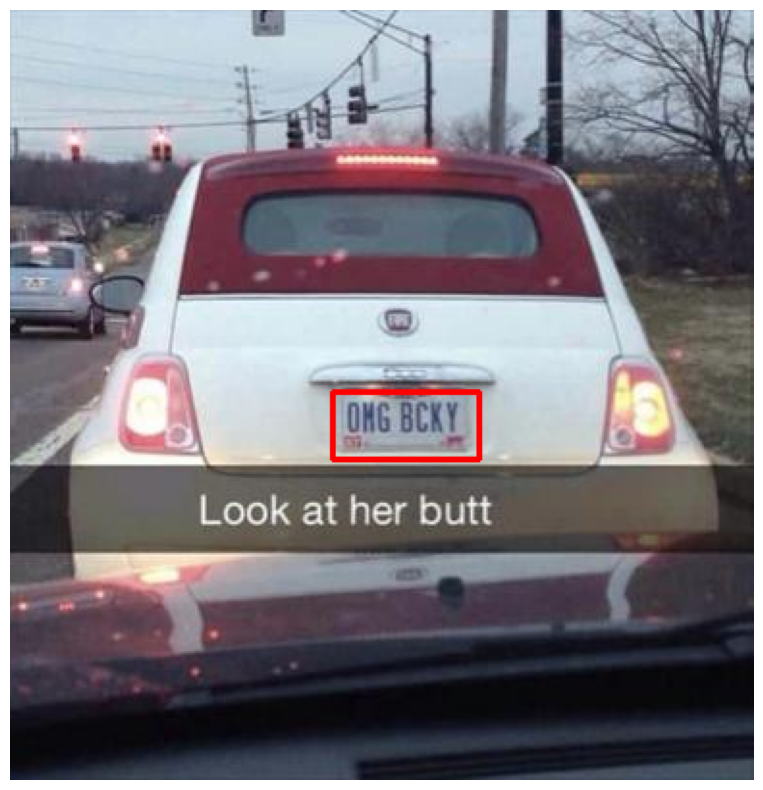

In [21]:
import cv2
import matplotlib.pyplot as plt

# Test image
test_image_path = "/content/drive/MyDrive/Greyscale Datasets/LicensePlates.v2i.yolov8/test/images/Cars38_png.rf.e2190f00a636e25ddf1c6e161fdb89e2.jpg"

# Running YOLOv8 prediction
results = model.predict(source=test_image_path, show=False)

# Load image for display
img = cv2.imread(test_image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw bounding boxes
for box in results[0].boxes.xyxy:
    x1, y1, x2, y2 = map(int, box)
    cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (255,0,0), 2)

# Show the image
plt.figure(figsize=(10,10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [23]:
# Install pytesseract Python package
!pip install pytesseract

# Install Tesseract OCR engine
!apt-get update
!apt-get install -y tesseract-ocr

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:4 https://cli.github.com/packages stable InRelease [3,917 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:9 https://cli.github.com/packages stable/main amd64 Packages [343 B]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,138 kB]
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd

In [24]:
import pytesseract
import cv2
import matplotlib.pyplot as plt

Detected License Plate: ‘Oe Ray


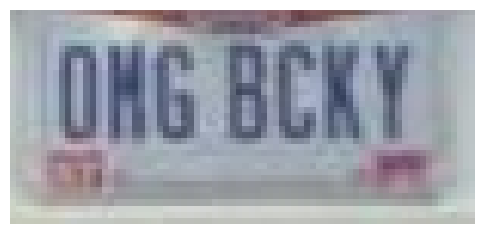

In [25]:
import pytesseract
import cv2
import matplotlib.pyplot as plt

# Loop through detected bounding boxes
for box in results[0].boxes.xyxy:
    x1, y1, x2, y2 = map(int, box)

    # Crop the license plate from the original image
    plate_crop = img[y1:y2, x1:x2]

    # Optional preprocessing for better OCR
    gray = cv2.cvtColor(plate_crop, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

    # OCR using pytesseract
    plate_text = pytesseract.image_to_string(thresh, config='--psm 8')  # PSM 8 = single word/line
    print("Detected License Plate:", plate_text.strip())

    # Display the cropped plate
    plt.figure(figsize=(6,3))
    plt.imshow(cv2.cvtColor(plate_crop, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [42]:
# The above prediction is not perfect not even close to the actual image. Will be using modified code for better not perfect predictions.

In [29]:
from ultralytics import YOLO

# Loading actual trained YOLOv8 model
det_model = YOLO('/content/drive/MyDrive/Greyscale Datasets/LicensePlates.v2i.yolov8/runs/detect/roboflow_yolov8_run4/weights/best.pt')


image 1/1 /content/drive/MyDrive/Greyscale Datasets/LicensePlates.v2i.yolov8/test/images/Cars38_png.rf.e2190f00a636e25ddf1c6e161fdb89e2.jpg: 640x640 1 license_plate, 258.8ms
Speed: 5.4ms preprocess, 258.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


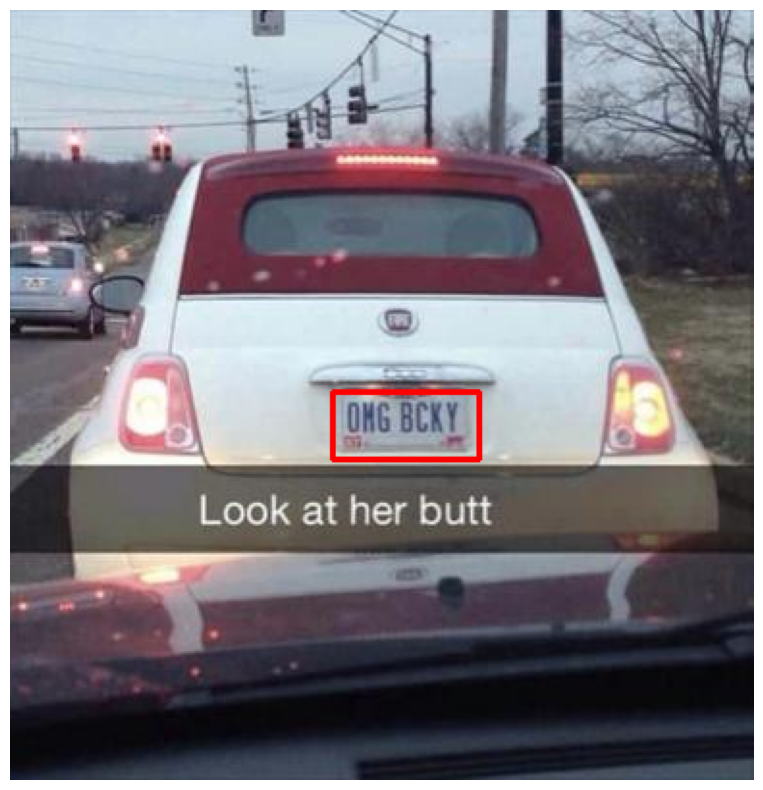

In [30]:
import cv2
import matplotlib.pyplot as plt

# Choose a test image from the dataset
test_image_path = "/content/drive/MyDrive/Greyscale Datasets/LicensePlates.v2i.yolov8/test/images/Cars38_png.rf.e2190f00a636e25ddf1c6e161fdb89e2.jpg"

# Run YOLOv8 detection
results = det_model.predict(source=test_image_path, show=False)

# Load image for visualization
img = cv2.imread(test_image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw bounding boxes
for box in results[0].boxes.xyxy:
    x1, y1, x2, y2 = map(int, box)
    cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (255,0,0), 2)

plt.figure(figsize=(10,10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

Detected License Plate: 0NGBCKY


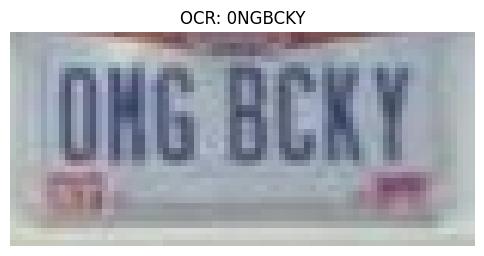

In [31]:
import pytesseract
import cv2
import matplotlib.pyplot as plt

# Loop through detected plates
for box in results[0].boxes.xyxy:
    x1, y1, x2, y2 = map(int, box)

    # Crop the plate
    plate_crop = img[y1:y2, x1:x2]

    # Grayscale
    gray = cv2.cvtColor(plate_crop, cv2.COLOR_BGR2GRAY)

    # Contrast enhancement
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced = clahe.apply(gray)

    # Resize to improve OCR
    scale_percent = 200  # 2x size
    width = int(enhanced.shape[1] * scale_percent / 100)
    height = int(enhanced.shape[0] * scale_percent / 100)
    resized = cv2.resize(enhanced, (width, height), interpolation=cv2.INTER_LINEAR)

    # Denoise & threshold
    blur = cv2.bilateralFilter(resized, 11, 17, 17)
    _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # OCR with whitelist
    custom_config = r'--oem 3 --psm 7 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
    plate_text = pytesseract.image_to_string(thresh, config=custom_config).strip()

    # Post-processing
    plate_text = ''.join([c for c in plate_text if c.isalnum()])  # remove invalid chars
    print("Detected License Plate:", plate_text)

    # Display cropped plate
    plt.figure(figsize=(6,3))
    plt.imshow(cv2.cvtColor(plate_crop, cv2.COLOR_BGR2RGB))
    plt.title(f"OCR: {plate_text}")
    plt.axis('off')
    plt.show()

In [32]:
# Replace this with your new test image
new_image_path = "/content/drive/MyDrive/Greyscale Datasets/LicensePlates.v2i.yolov8/test/images/Cars429_png.rf.12f621bb0095d50d035416773aad6d9d.jpg"


image 1/1 /content/drive/MyDrive/Greyscale Datasets/LicensePlates.v2i.yolov8/test/images/Cars429_png.rf.12f621bb0095d50d035416773aad6d9d.jpg: 640x512 1 license_plate, 507.4ms
Speed: 3.3ms preprocess, 507.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 512)
Detected License Plate: KAISER


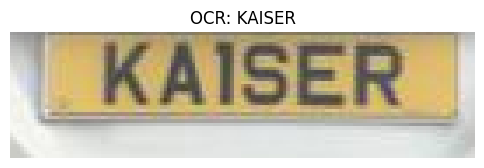

In [33]:
# Run YOLOv8 detection on new image
results = det_model.predict(source=new_image_path, show=False)

# Load image for processing
img = cv2.imread(new_image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Loop through detected plates
for box in results[0].boxes.xyxy:
    x1, y1, x2, y2 = map(int, box)
    plate_crop = img[y1:y2, x1:x2]

    # Preprocessing for OCR
    gray = cv2.cvtColor(plate_crop, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced = clahe.apply(gray)
    scale_percent = 200
    width = int(enhanced.shape[1]*scale_percent/100)
    height = int(enhanced.shape[0]*scale_percent/100)
    resized = cv2.resize(enhanced, (width, height), interpolation=cv2.INTER_LINEAR)
    blur = cv2.bilateralFilter(resized, 11, 17, 17)
    _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # OCR
    custom_config = r'--oem 3 --psm 7 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
    plate_text = pytesseract.image_to_string(thresh, config=custom_config).strip()
    plate_text = ''.join([c for c in plate_text if c.isalnum()])  # clean text

    print("Detected License Plate:", plate_text)

    # Display the plate
    plt.figure(figsize=(6,3))
    plt.imshow(cv2.cvtColor(plate_crop, cv2.COLOR_BGR2RGB))
    plt.title(f"OCR: {plate_text}")
    plt.axis('off')
    plt.show()

In [34]:
# Example: new test image
new_image_path = "/content/drive/MyDrive/Greyscale Datasets/LicensePlates.v2i.yolov8/test/images/Cars96_png.rf.952dc6fa376fe24e1d1087d3877ba123.jpg"


image 1/1 /content/drive/MyDrive/Greyscale Datasets/LicensePlates.v2i.yolov8/test/images/Cars96_png.rf.952dc6fa376fe24e1d1087d3877ba123.jpg: 416x640 1 license_plate, 384.2ms
Speed: 7.4ms preprocess, 384.2ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)
Detected License Plate: MPGOMN112


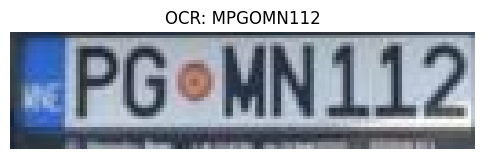

In [35]:
# YOLOv8 detection
results = det_model.predict(source=new_image_path, show=False)

# Load image
img = cv2.imread(new_image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Loop through detected bounding boxes
for box in results[0].boxes.xyxy:
    x1, y1, x2, y2 = map(int, box)
    plate_crop = img[y1:y2, x1:x2]

    # Preprocessing for OCR
    gray = cv2.cvtColor(plate_crop, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced = clahe.apply(gray)

    # Resize to improve OCR
    scale_percent = 200
    width = int(enhanced.shape[1]*scale_percent/100)
    height = int(enhanced.shape[0]*scale_percent/100)
    resized = cv2.resize(enhanced, (width, height), interpolation=cv2.INTER_LINEAR)

    # Denoise and threshold
    blur = cv2.bilateralFilter(resized, 11, 17, 17)
    _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # OCR
    custom_config = r'--oem 3 --psm 7 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
    plate_text = pytesseract.image_to_string(thresh, config=custom_config).strip()
    plate_text = ''.join([c for c in plate_text if c.isalnum()])

    print("Detected License Plate:", plate_text)

    # Display cropped plate
    plt.figure(figsize=(6,3))
    plt.imshow(cv2.cvtColor(plate_crop, cv2.COLOR_BGR2RGB))
    plt.title(f"OCR: {plate_text}")
    plt.axis('off')
    plt.show()

In [ ]:
# Not a perfect detection but worth it.